# Titanic Survival Prediction

In [37]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df  = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 🧾 Titanic Dataset Features and Their Meanings

| Feature   | Description                                         | Notes                                       |
|-----------|-----------------------------------------------------|---------------------------------------------|
| `survival` | Survival                                            | 0 = No, 1 = Yes                              |
| `pclass`   | Ticket class                                        | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| `sex`      | Sex                                                 | Male or Female                              |
| `Age`      | Age in years                                        | May contain missing values                  |
| `sibsp`    | # of siblings/spouses aboard the Titanic            | Sibling = brother, sister, step-sibling     |
| `parch`    | # of parents/children aboard the Titanic            | Child = son, daughter, step-child           |
| `ticket`   | Ticket number                                       | Alphanumeric, may not indicate much alone   |
| `fare`     | Passenger fare                                      | Amount paid for the ticket                  |
| `cabin`    | Cabin number                                        | Many missing values                         |
| `embarked` | Port of Embarkation                                 | C = Cherbourg, Q = Queenstown, S = Southampton |


In [39]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

since the above resulst shows missing values in age , cabin and embarked we need to handle them 

# Feature Engineering 

In [41]:
df = df.drop(columns=['Ticket', 'PassengerId' , 'Name' , 'Cabin'], axis=1) # dropping unnecessary columns

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # handling missing age values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # handling missing embarked values

<Axes: xlabel='Survived', ylabel='Age'>

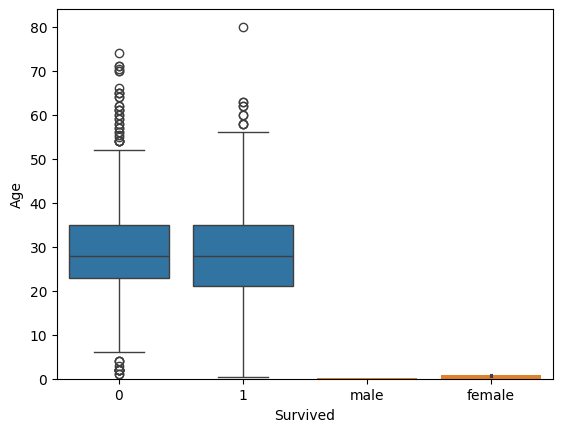

In [53]:
sns.boxplot(x="Survived", y="Age" , data=df)
sns.barplot(x='Sex', y='Survived', data=df) 

In [54]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [55]:
# one hot encoding embarked , sex and Pclass columns since they are categorical variables
df = pd.get_dummies(df, columns=['Embarked' , 'Sex' , 'Pclass'] , drop_first=True)
df

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,True,False,False,False
4,0,35.0,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,True,True,False
887,1,19.0,0,0,30.0000,False,True,False,False,False
888,0,28.0,1,2,23.4500,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,False,True,False,False
